## PREVISÃO DE PREÇO DAS CASAS NA CALIFÓRNIA

Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

# Bibliotecas, conexão com o drive e importação dos dados de treino

In [1]:
# Bibliotecas

# Manipulação dos dados e gráficos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid') # define fundo dos gráficos

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

# Google drive
from google.colab import drive
drive.mount('/content/drive') # conecta o drive

Mounted at /content/drive


In [2]:
# dados de treino
df = pd.read_csv('/content/drive/MyDrive/KAGGLE/California Housing Prices/Dados/housing.csv')

In [3]:
# observação inicial do DataFrame
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**SOBRE OS DADOS**

1.longitude: Uma medida de quão a oeste uma casa está; um valor mais alto indica uma posição mais a oeste

2.latitude: Uma medida de quão ao norte uma casa está; um valor mais alto indica uma posição mais ao norte

3.housingMedianAge: Idade média de uma casa dentro de um quarteirão; um número menor indica uma construção mais nova

4.totalRooms: Número total de cômodos dentro de um quarteirão

5.totalBedrooms: Número total de quartos dentro de um quarteirão

6.population: Número total de pessoas residindo dentro de um quarteirão

7.households: Número total de domicílios, um grupo de pessoas residindo em uma unidade habitacional, para um quarteirão

8.medianIncome: Renda mediana dos domicílios dentro de um quarteirão de casas (medida em dezenas de milhares de dólares americanos)

9.medianHouseValue: Valor mediano das casas para os domicílios dentro de um quarteirão (medido em dólares americanos)

10.oceanProximity: Localização da casa em relação ao oceano/mar

** Informações retiradas da página do Kaggle

# Preparação do DataFrame

In [4]:
# Dados nulos e duplicados
print(f'Dados nulos: {df.isnull().sum().sum()}')
print(f'Dados duplicados: {df.duplicated().sum()}')

Dados nulos: 207
Dados duplicados: 0


Existem 207 dados nulos que podem interferir no DataFrame e nenhum dado duplicado, devemos identificar agora onde estão estes dados nulos.

In [5]:
df.isnull().sum() # distribuição dos dados nulos

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


Os valores nulos estão todos em uma única coluna

In [6]:
# informações sobre os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


---

Os tipos de dados das variáveis estão coerentes, inicialmente apenas dois tratamentos parecem necessários.

**Dois tratementos principais - inicialmente (posteriormente pode ser explorado mais)**
 - **Gerenciar a variável 'ocean_proximity'** -> É explorado na literatura o efeito espacial da proximidade dos imóveis a certos ambientes e a influência no seu preço, portanto está variável deve ser convertida em uma dummy.

 - **Valores nulos de 'total_bedrooms'** -> Os valores NaN identificados anteriormentes.

---

In [7]:
# Verifica distribuição dos valores da variável 'ocean_proximity'
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [8]:
# Criação de variáveis dummy - 'ocean_proximity'
df = pd.get_dummies(df, columns=['ocean_proximity'], dtype=int) #dtype para converter os valores bool
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [9]:
# Proporção de Nulos em relação ao total da variável 'total_bedrooms'
null_percent = (df['total_bedrooms'].isnull().sum() / len(df['total_bedrooms']))*100 # valor percentual
print(f'Proporção de Nulos: {null_percent:.4f}%')

Proporção de Nulos: 1.0029%


---

**Aproximadamente 1,00% de valores nulos em relação ao total de observações**

Por ter pouca expressão, os valores nulos na variável 'total_bedrroms' podem ser tratados via exlcusão, afinal, representam um percentual pequeno dos dados (pouca perda de informação).

---

In [10]:
# Exclui os valores nulos em 'total_bedrooms'
df.dropna(inplace=True)

In [11]:
# Checa nulos novamente
df.isnull().sum().sum() # soma de todos os valores nulos no DataFrame

0

In [12]:
# Move a variável target 'median_house_value' para o final do DataFrame
# Facilita a manipulação
coluna_target = df.pop('median_house_value') # método pop para listas - "Remove o item na posição fornecida na lista e retorna".
df['median_house_value'] = coluna_target # Cria coluna nova - mesmo nome e mesmos valores porém, no final.

In [13]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0,342200.0


---

** NOTAS FINAIS **
1. Todos os valores

# Estatística descritiva e análise visual dos dados

<Axes: xlabel='longitude', ylabel='latitude'>

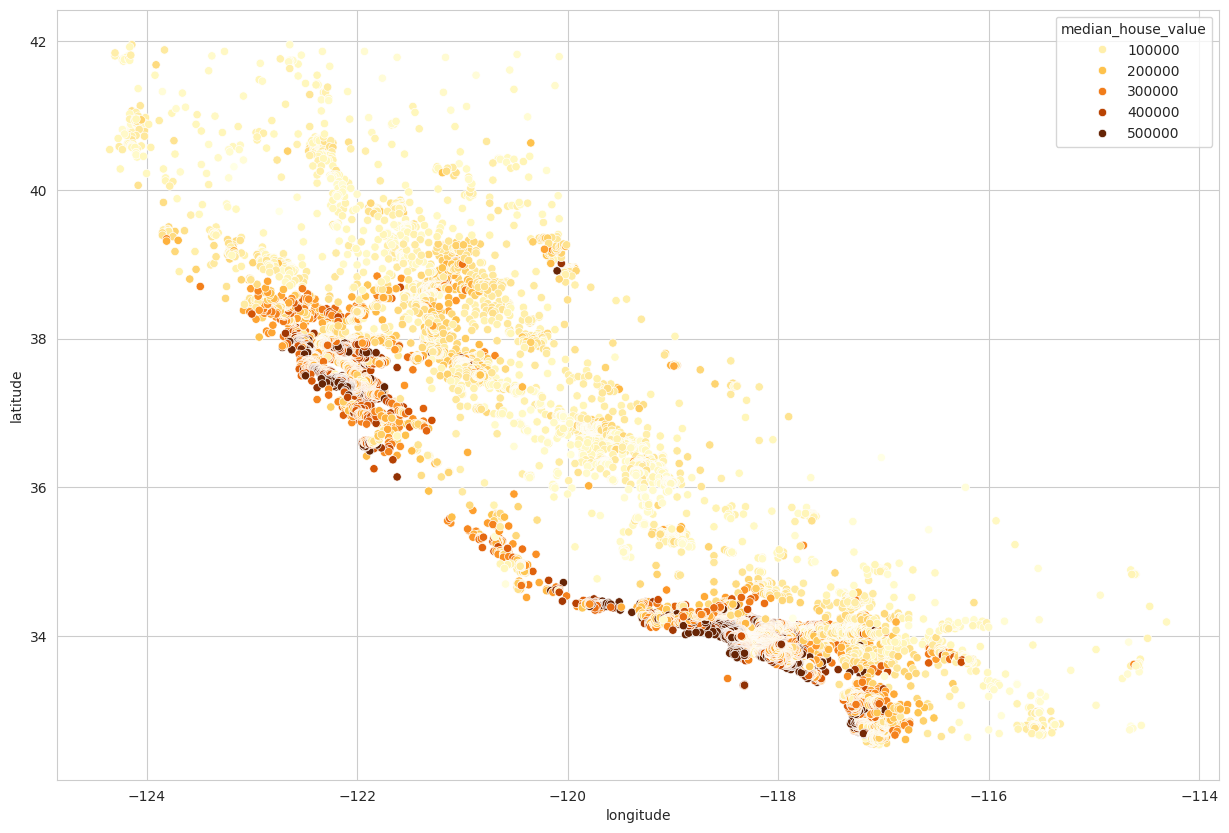

In [14]:
# Mapa simples com scatterplot
plt.figure(figsize=(15,10))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='median_house_value', palette='YlOrBr')

In [15]:
# Descrição das variáveis
df.iloc[:,2:].describe() # exceto: longitude e latidute

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,0.442128,0.317917,0.000245,0.111095,0.128615,206864.413155
std,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,0.496652,0.465678,0.015641,0.314257,0.334782,115435.667099
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,0.000000,0.000000,0.000000,0.000000,14999.000000
25%,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,0.000000,0.000000,0.000000,0.000000,0.000000,119500.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,0.000000,0.000000,0.000000,0.000000,0.000000,179700.000000
75%,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,1.000000,1.000000,0.000000,0.000000,0.000000,264700.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,1.000000,1.000000,1.000000,1.000000,1.000000,500001.000000


** Essa é uma das análises mais importantes, é importante ter atenção aqui**
A média é uma estatística muito mais sensível a valores extremos que a mediana (+robusta).
- Diferenças entre médias e medianas significativas podem indicar influência de valores discrepantes (**outliers**)
- Ao analisar os **quartis** é possível perceber a presença dos outliers na maioria das variáveis, eles devem ser tratados!

In [16]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', 'median_house_value'],
      dtype='object')

<Axes: >

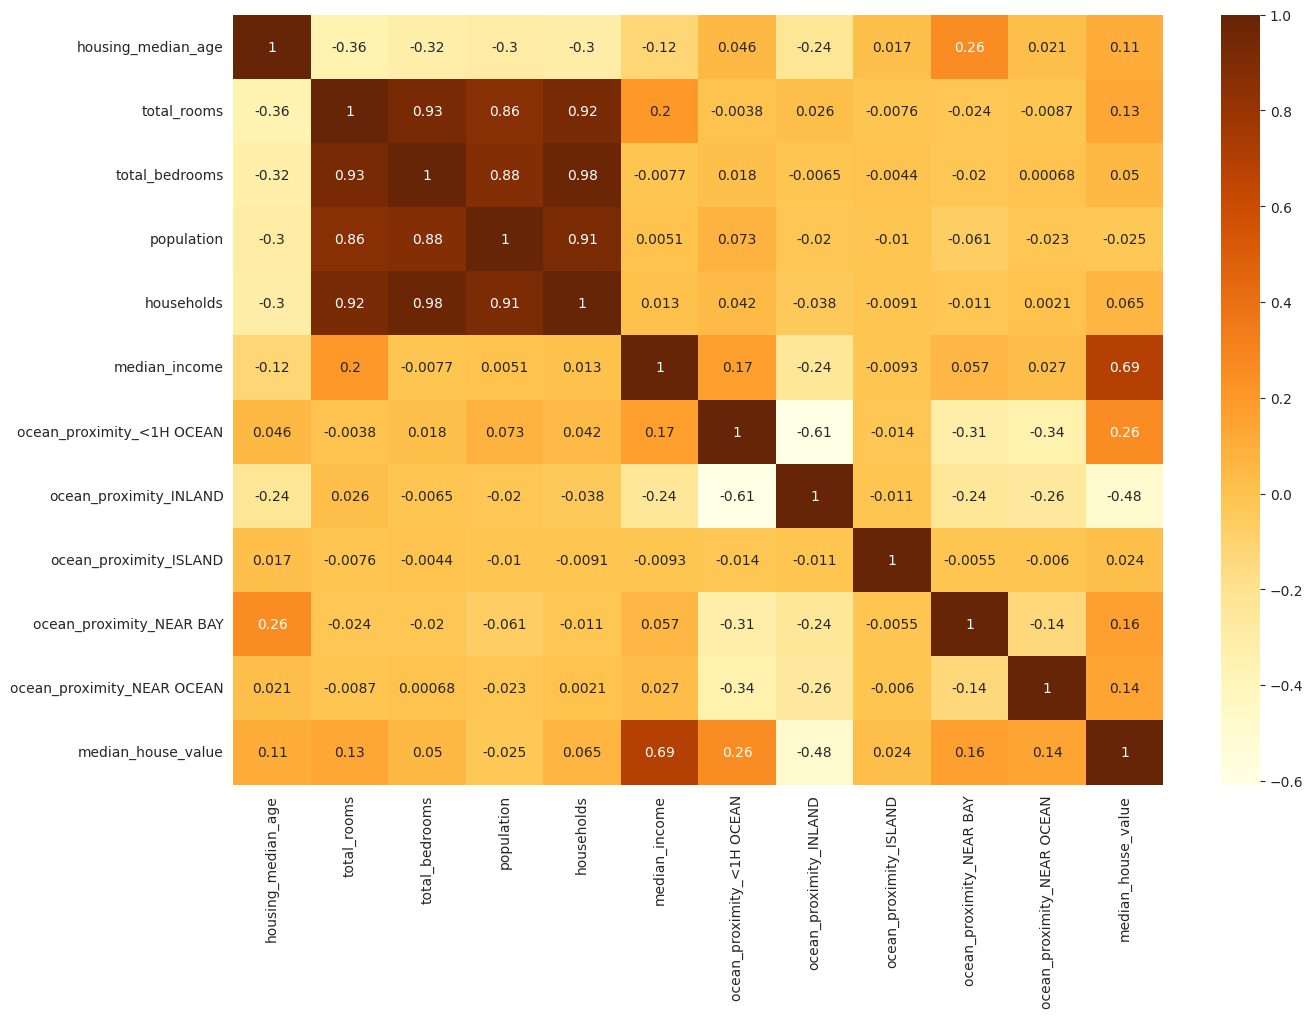

In [17]:
# Analise de correlação das variáveis
matriz_corr = df.drop(columns=['longitude','latitude'], axis=1).corr() # armazena correlações
plt.figure(figsize=(15,10))
sns.heatmap(matriz_corr, annot=True, cmap='YlOrBr') # plota matriz de correlação

array([[<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'ocean_proximity_<1H OCEAN'}>,
        <Axes: title={'center': 'ocean_proximity_INLAND'}>,
        <Axes: title={'center': 'ocean_proximity_ISLAND'}>],
       [<Axes: title={'center': 'ocean_proximity_NEAR BAY'}>,
        <Axes: title={'center': 'ocean_proximity_NEAR OCEAN'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

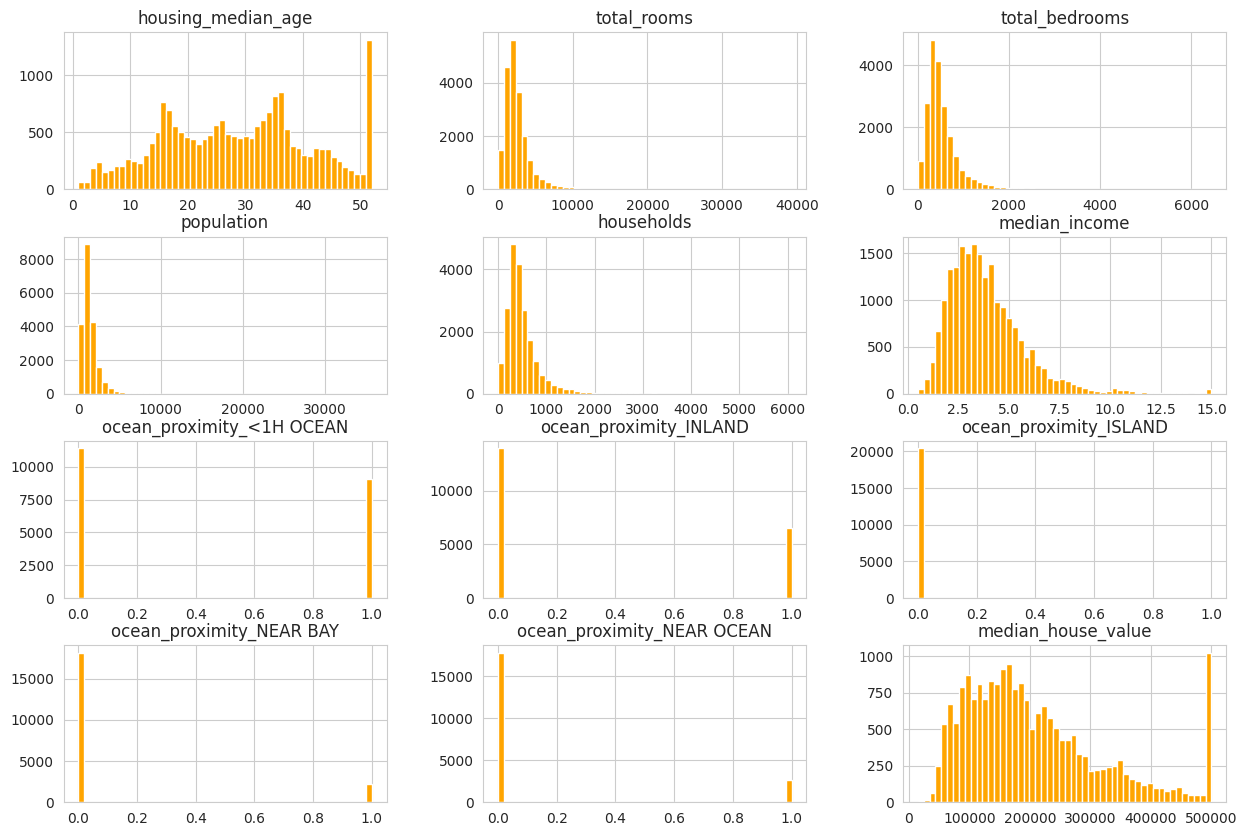

In [18]:
# Distribuição das variáveis
# Uso da matplotlib - praticidade

df.iloc[:,2:].hist(figsize=(15,10), bins=50, color='orange') # exceto: latitude e longitude

Assimetria nas distribuições!

<Axes: >

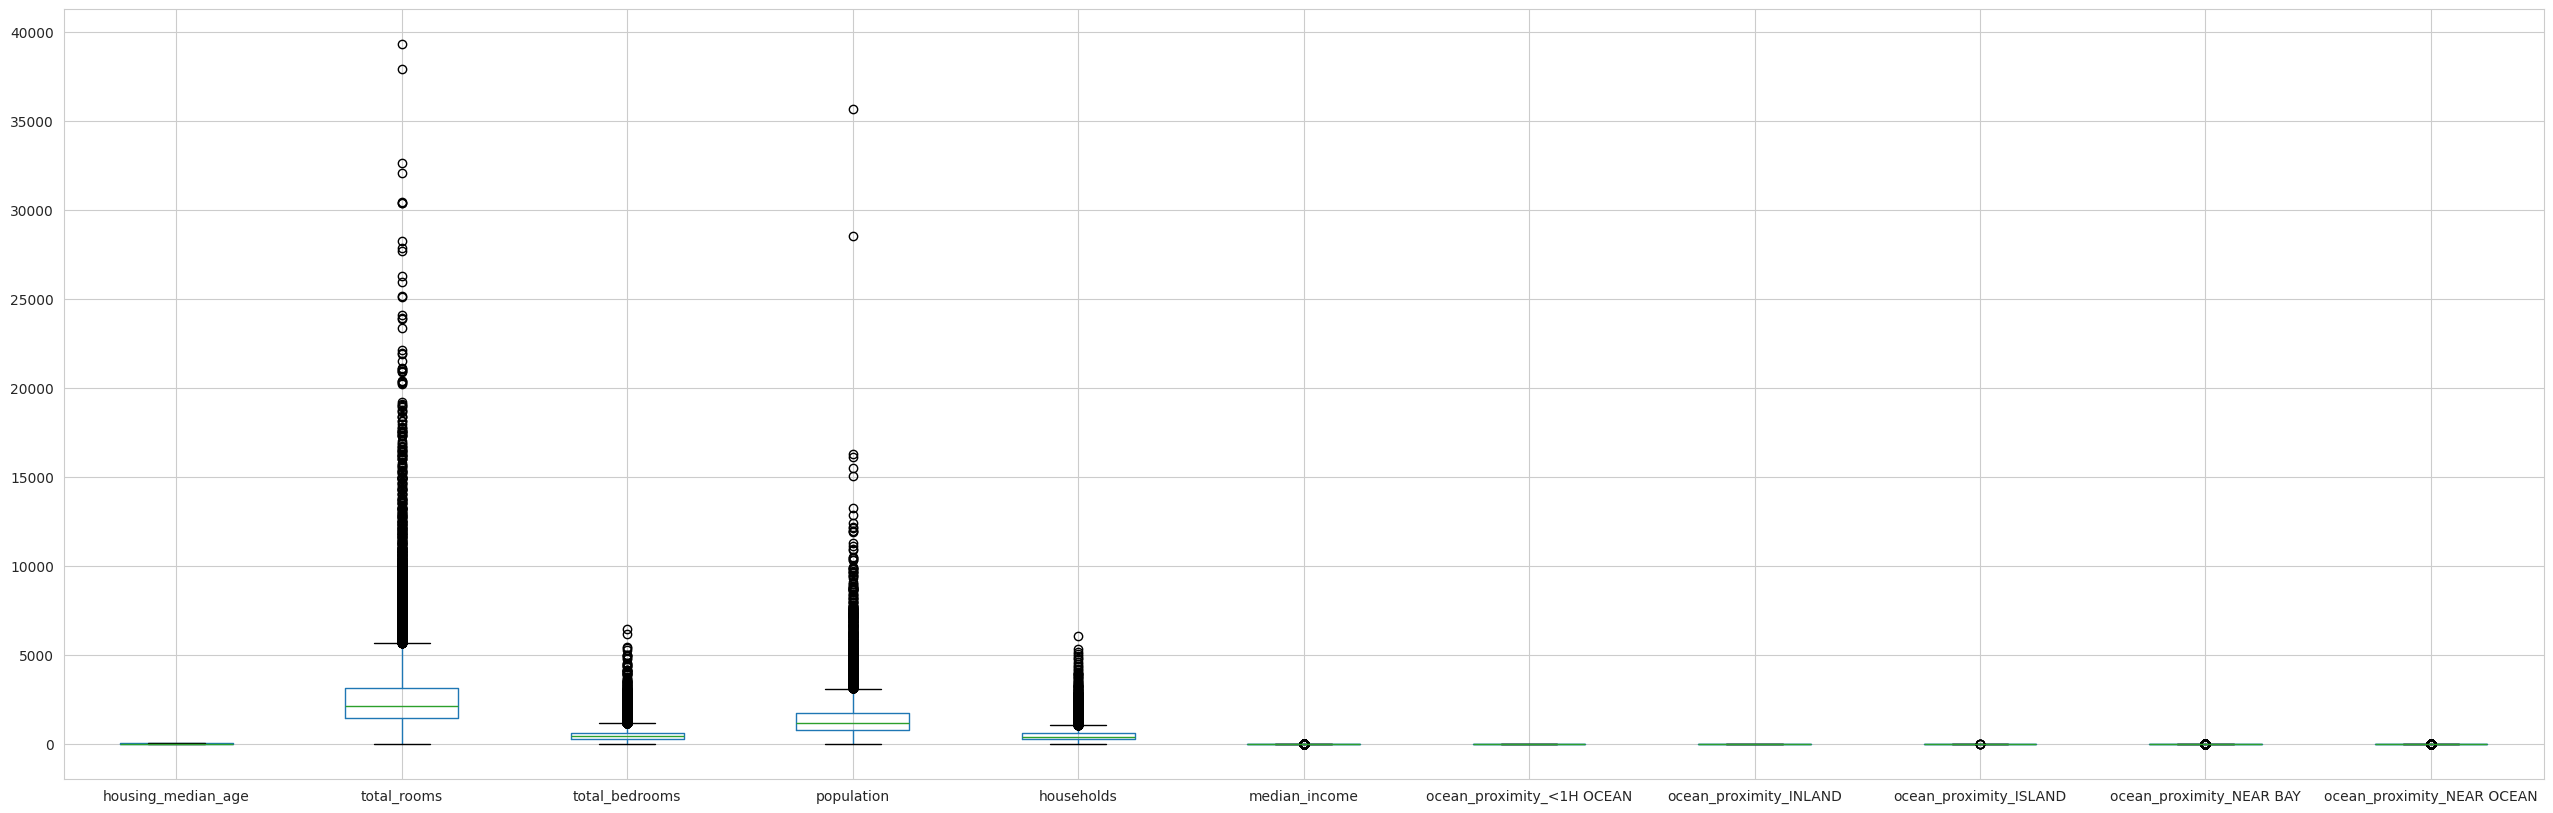

In [19]:
# Boxplot
# Distribuições e nova visualização das variáveis, especialmente seus outliers

df.iloc[:,2:].drop('median_house_value', axis=1).boxplot(figsize=(32,10))

<Axes: >

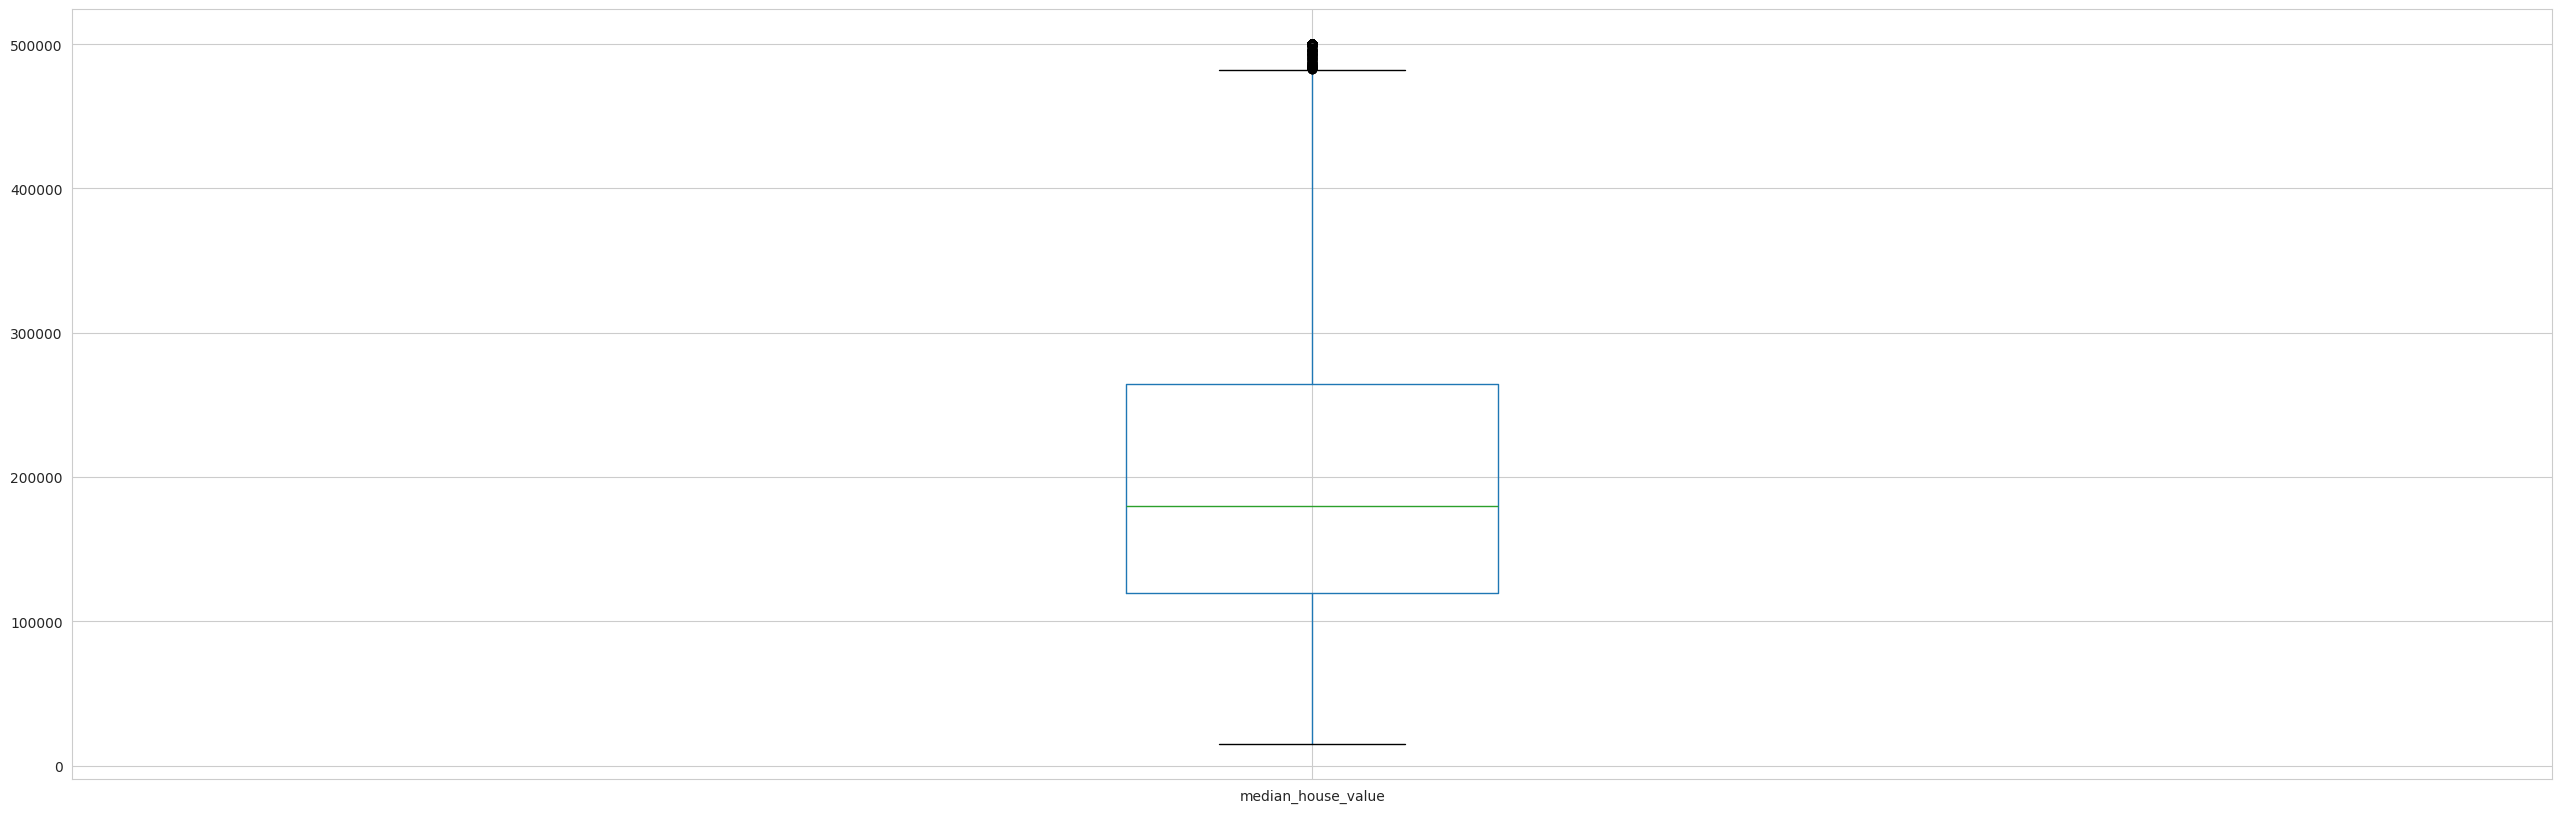

In [20]:
# Boxplot 'median_house_value'
df.iloc[:,-1:].boxplot(figsize=(32,10))

<Figure size 1500x1000 with 0 Axes>

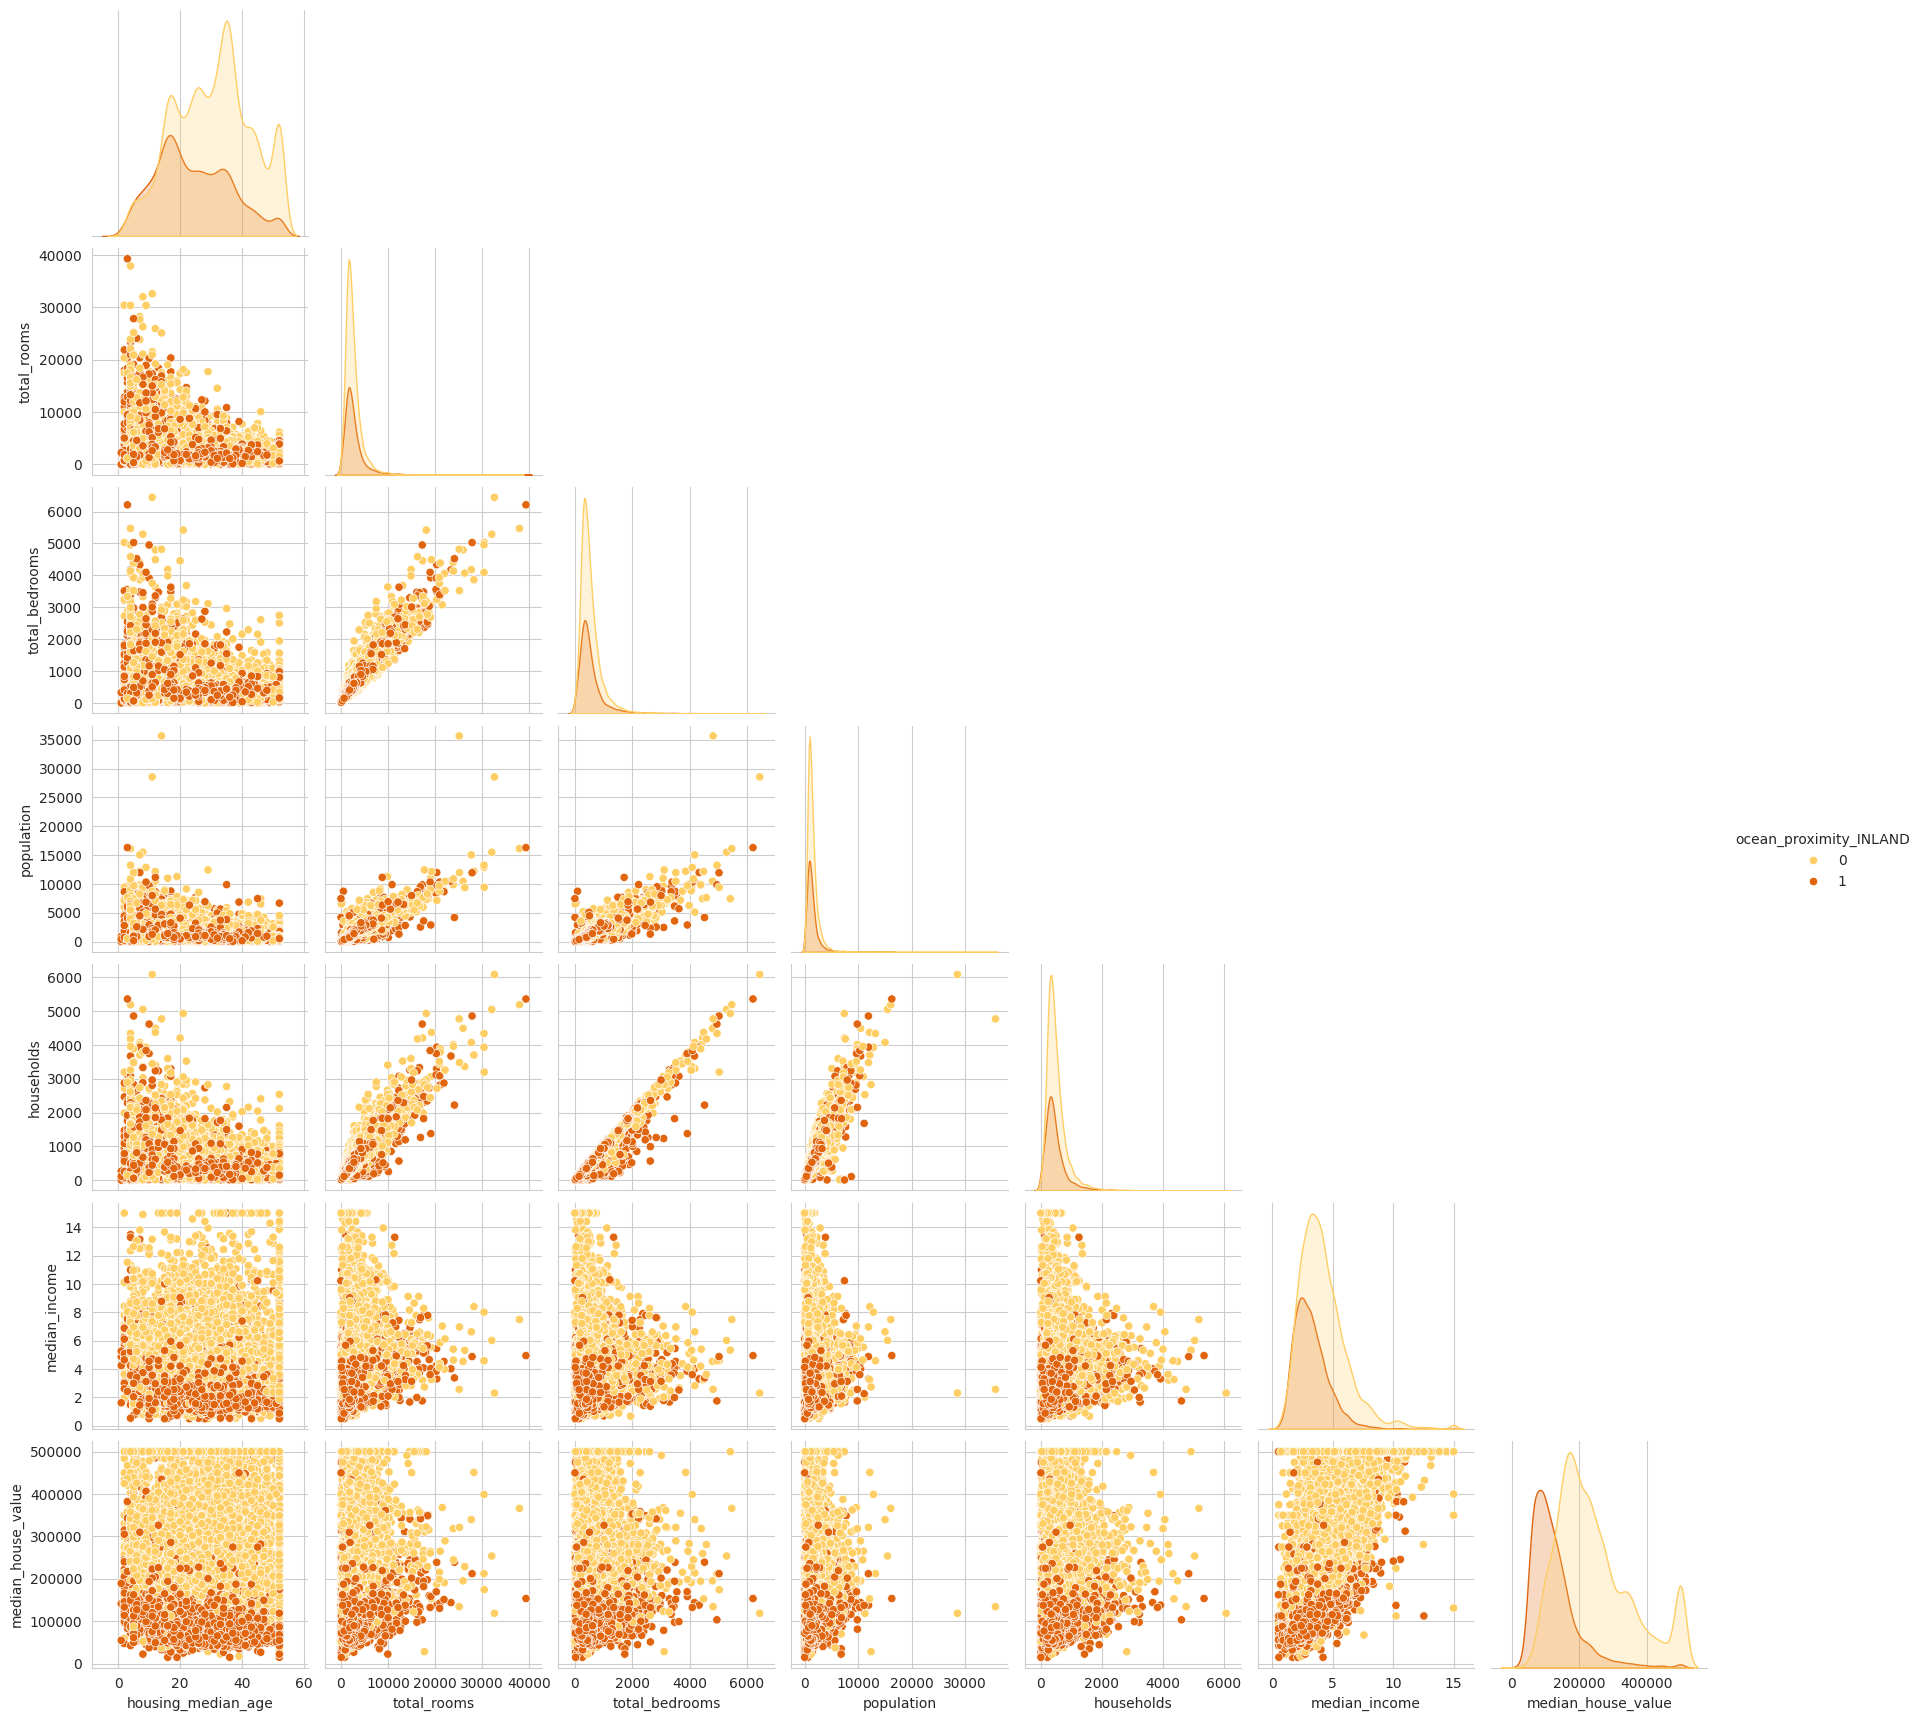

In [21]:
# Combinação das variáveis em gráficos de dispersão
pair_plot = df[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity_INLAND']]

plt.figure(figsize=(15,10))
sns.pairplot(pair_plot, hue='ocean_proximity_INLAND', palette='YlOrBr', corner=True)

# Tratamento, featuring engineering e análise visual dos dados

array([[<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>],
       [<Axes: title={'center': 'median_income'}>, <Axes: >]],
      dtype=object)

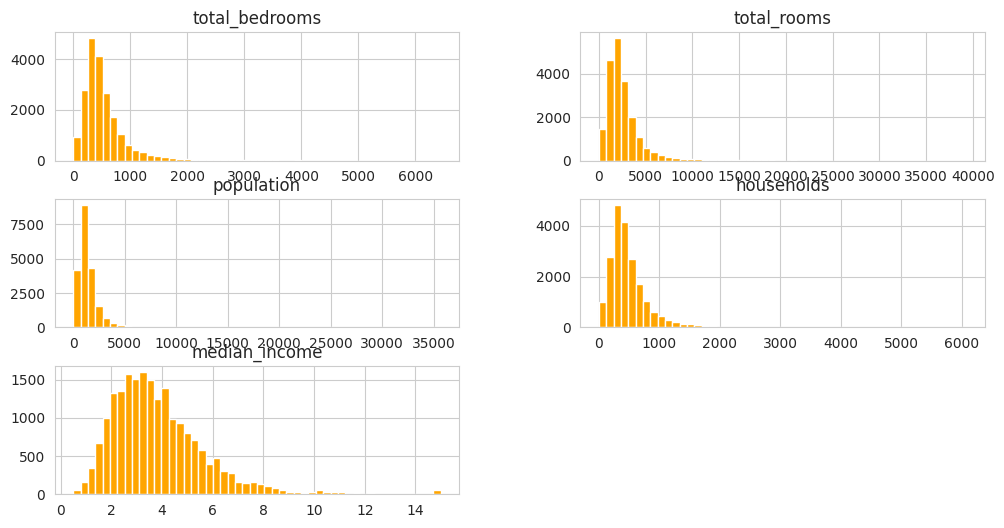

In [22]:
# Mudança na escala das variáveis com distribuição assimétrica
# Logaritmos

df2 = df[['total_bedrooms', 'total_rooms', 'population', 'households', 'median_income']]
df2.hist(figsize=(12,6), bins=50, color='orange')

array([[<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>],
       [<Axes: title={'center': 'median_income'}>, <Axes: >]],
      dtype=object)

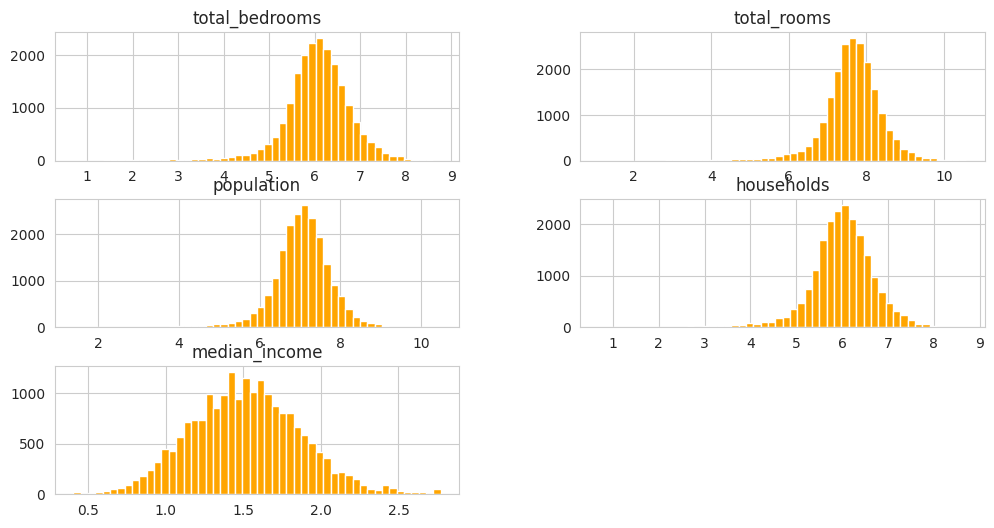

In [23]:
df2.apply(np.log1p).hist(figsize=(12,6), bins=50, color='orange') # aplica np.log + 1

In [24]:
df2.describe()

,total_bedrooms,total_rooms,population,households,median_income
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,537.870553,2636.504233,1424.946949,499.433465,3.871162
std,421.385070,2185.269567,1133.208490,382.299226,1.899291
min,1.000000,2.000000,3.000000,1.000000,0.499900
25%,296.000000,1450.000000,787.000000,280.000000,2.563700
50%,435.000000,2127.000000,1166.000000,409.000000,3.536500
75%,647.000000,3143.000000,1722.000000,604.000000,4.744000
max,6445.000000,39320.000000,35682.000000,6082.000000,15.000100


In [25]:
df2.apply(np.log1p).describe() # Comparação com as variáveis logaritmizadas

,total_bedrooms,total_rooms,population,households,median_income
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,6.054708,7.629543,7.025121,5.984538,1.517119
std,0.726728,0.750260,0.736336,0.726856,0.358647
min,0.693147,1.098612,1.386294,0.693147,0.405398
25%,5.693732,7.280008,6.669498,5.638355,1.270799
50%,6.077642,7.662938,7.062192,6.016157,1.512156
75%,6.473891,8.053251,7.451822,6.405228,1.748156
max,8.771215,10.579514,10.482430,8.713253,2.772595


In [26]:
# Aplica a padronização nas variáveis
df['total_rooms'] = np.log(df['total_rooms'] + 1)
df['total_bedrooms'] = np.log(df['total_bedrooms'] + 1)
df['population'] = np.log(df['population'] + 1)
df['households'] = np.log(df['households'] + 1)
df['median_income'] = np.log(df['median_income'] + 1)

In [27]:
# Cria algumas variáveis que podem desempenhar bem

df['bedrooms_ratio'] = df['total_bedrooms'] / df['total_rooms'] # quantidade de quartos por cômodos no distrito
df['households_ratio'] = df['households'] / df['population'] # quantidade de famílias por população no distrito
df['rooms_households_ratio'] = df['total_rooms'] / df['households'] # quantidade de quartos por família no distrito


<Axes: >

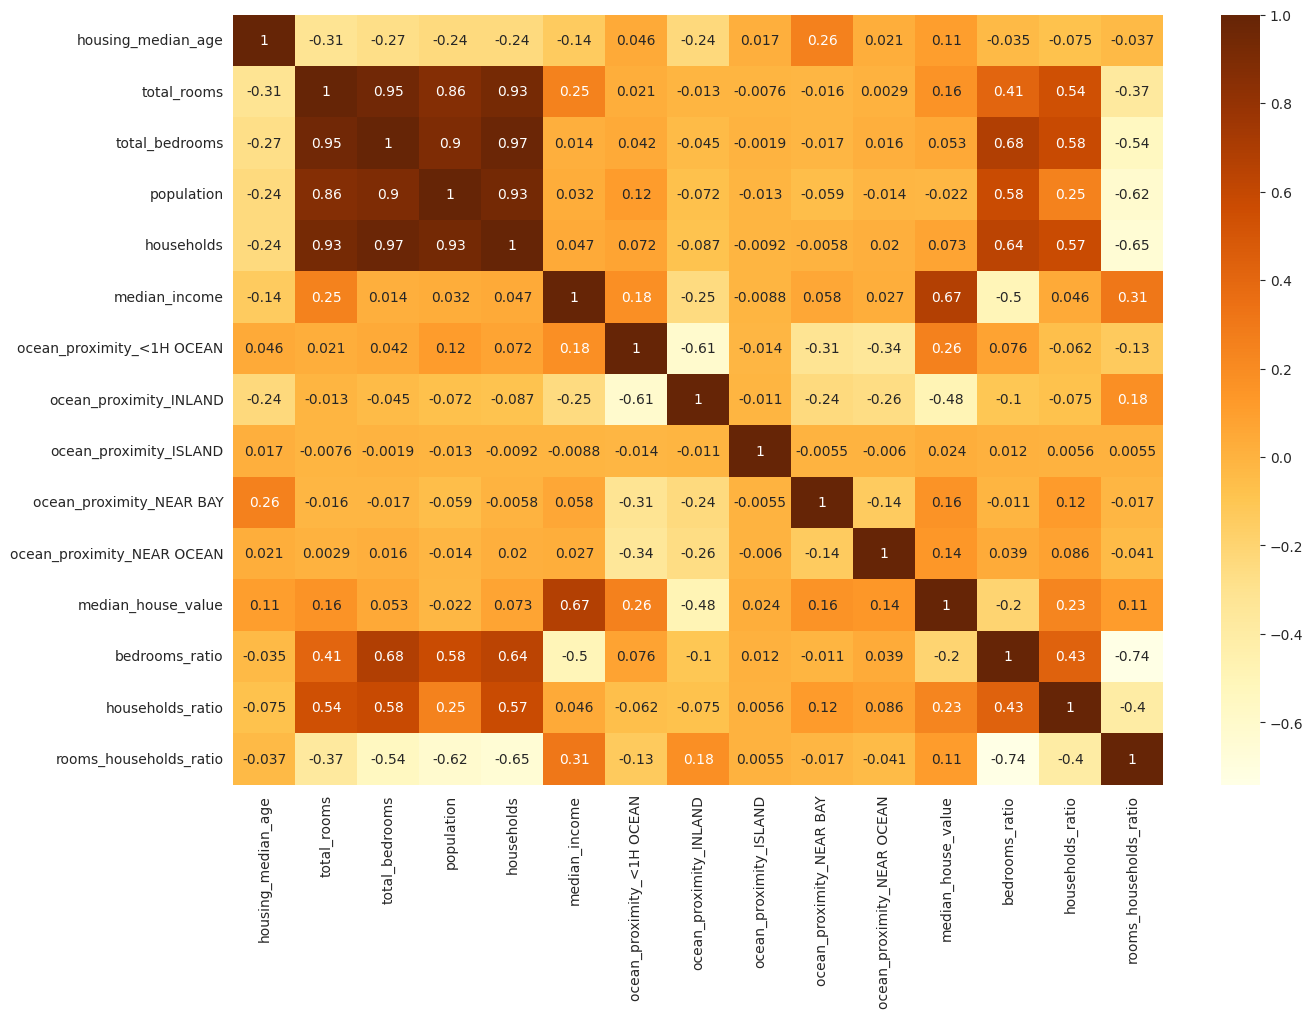

In [28]:
# Correlação das variáveis
matriz_corr = df.drop(columns=['longitude','latitude'], axis=1).corr() # refaz var. variáveis para correlação

plt.figure(figsize=(15,10))
sns.heatmap(matriz_corr, annot=True, cmap='YlOrBr') # plota matriz de correlação

<Axes: >

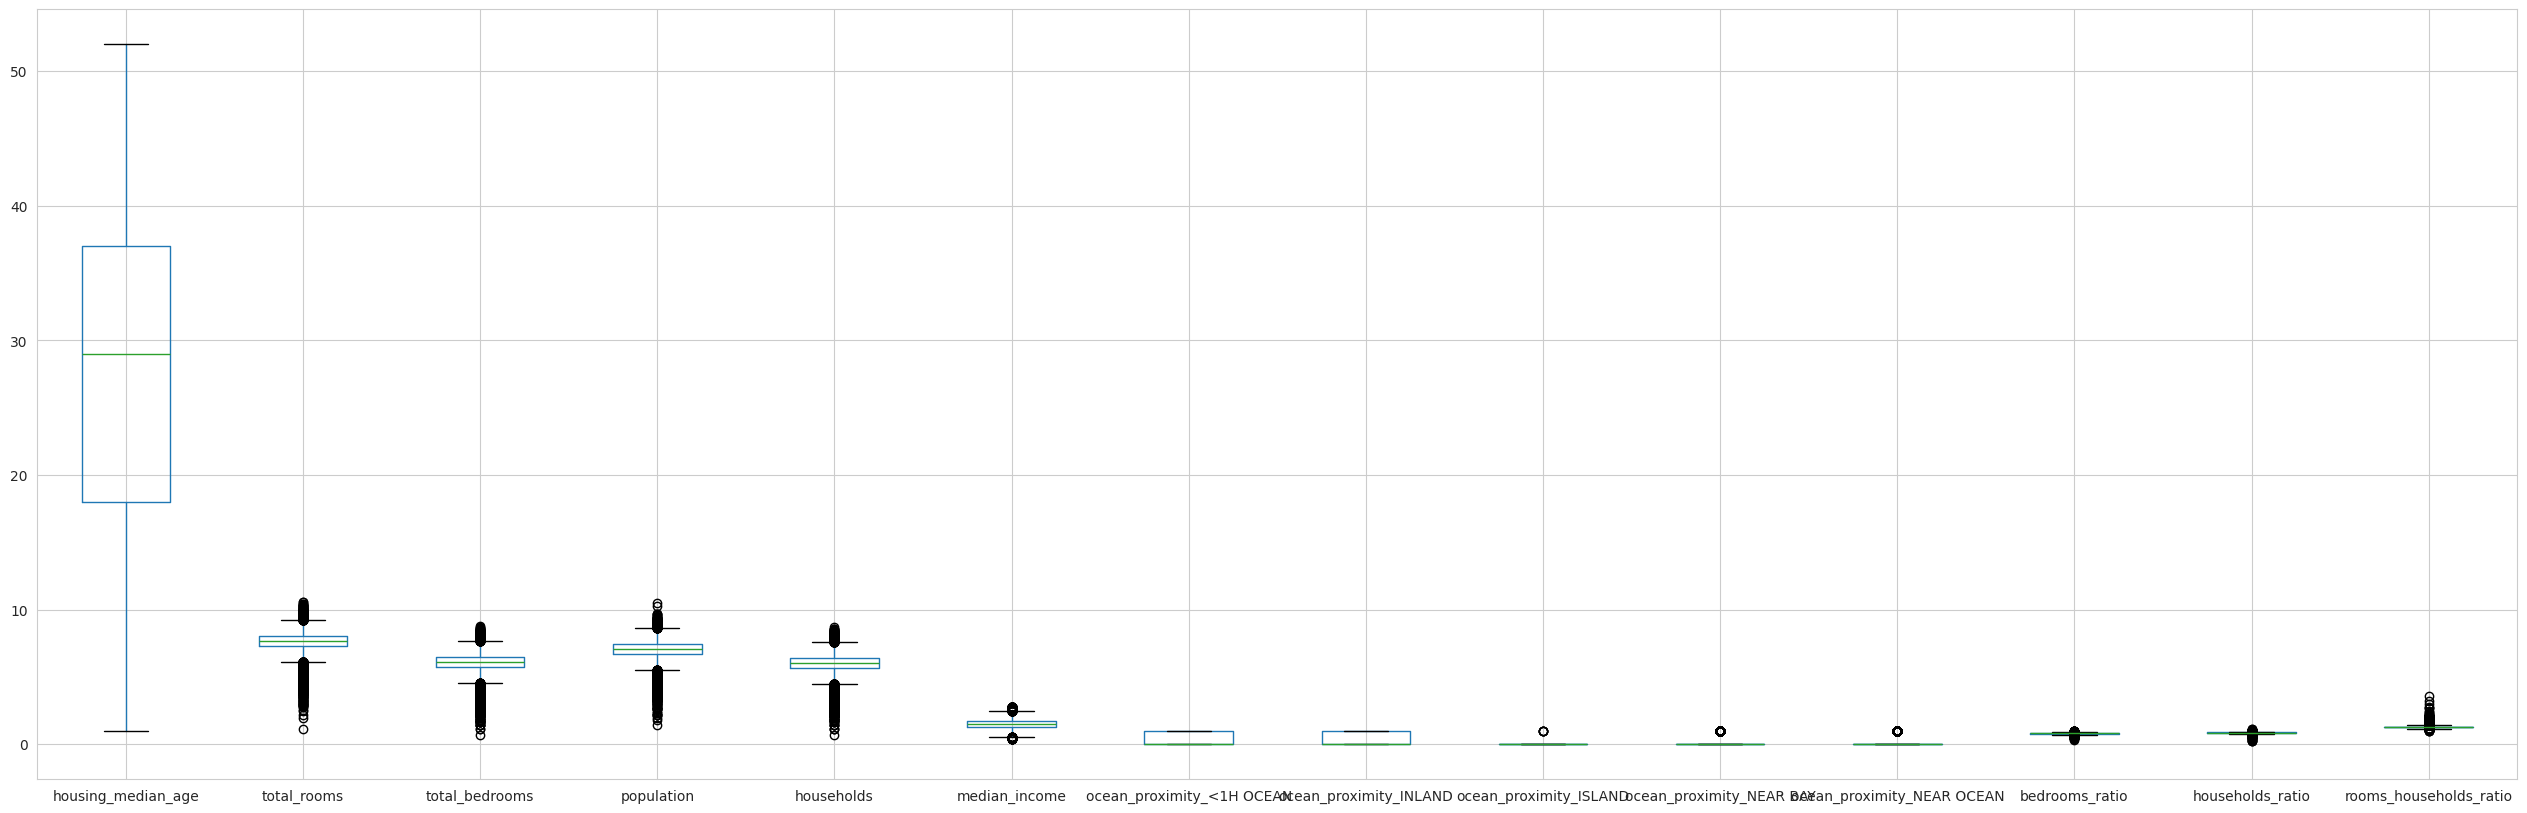

In [29]:
# Boxplot
# Distribuições e nova visualização das variáveis, especialmente seus outliers

df.iloc[:,2:].drop('median_house_value', axis=1).boxplot(figsize=(32,10))

**TRATAMENTO DE OUTLIERS**

# Modelos de machine learning

In [30]:
# Variáveis do modelo
X = df.drop(columns=['median_house_value'], axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Separação dos dados de treino e teste

In [31]:
# Modelo de regressão linear

lin_reg = LinearRegression() # cria objeto de regressão sklearn

lin_reg.fit(X_train, y_train) # ajusta os dados ao modelo
lin_reg.score(X_test, y_test) # score do modelo (dados de teste)

0.6463816826656769

In [32]:
lin_reg.predict(X_test).shape # predição

(6130,)

In [33]:
# Erro quadrático médio e erro absoluto médio
mse = mean_squared_error(y_test, lin_reg.predict(X_test))
mae = mean_absolute_error(y_test, lin_reg.predict(X_test))

# Exibe os resultados
print(f'ERRO QUADRÁTICO MÉDIO: {mse:.2f}')
print(f'ERRO ABSOLUTO MÉDIO: {mae:.2f}')


ERRO QUADRÁTICO MÉDIO: 4637586815.99
ERRO ABSOLUTO MÉDIO: 51324.31


In [34]:
# Modelo de RandomForest
forest = RandomForestRegressor() # testar: n_estimators=, criterion=, random_state=
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.8146541352207557

In [35]:
forest.predict(X_test).shape

(6130,)

In [36]:
# Erro quadrático médio e erro absoluto médio
mse = mean_squared_error(y_test, forest.predict(X_test))
mae = mean_absolute_error(y_test, forest.predict(X_test))

# Exibe os resultados
print(f'ERRO QUADRÁTICO MÉDIO: {mse:.2f}')
print(f'ERRO ABSOLUTO MÉDIO: {mae:.2f}')


ERRO QUADRÁTICO MÉDIO: 2430749474.12
ERRO ABSOLUTO MÉDIO: 32387.19


In [37]:
# Ajuste dos dados
r2_forest = r2_score(y_test, forest.predict(X_test)) # Random Forest
r2_lin = r2_score(y_test, lin_reg.predict(X_test)) # Linear regression

print(f'R2: {r2_forest:.2f}')
print(f'R2: {r2_lin:.2f}')

R2: 0.81
R2: 0.65


In [38]:
# SVR model
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

-0.04702613305840342

In [39]:
# Erro quadrático médio e erro absoluto médio
mse = mean_squared_error(y_test, svr.predict(X_test))
mae = mean_absolute_error(y_test, svr.predict(X_test))

# Exibe os resultados
print(f'ERRO QUADRÁTICO MÉDIO: {mse:.2f}')
print(f'ERRO ABSOLUTO MÉDIO: {mae:.2f}')


ERRO QUADRÁTICO MÉDIO: 13731400079.24
ERRO ABSOLUTO MÉDIO: 87572.03


In [40]:
r2_svr = r2_score(y_test, svr.predict(X_test)) # SVR
print(f'R2: {r2_svr:.2f}')

R2: -0.05


In [42]:
knnr = KNeighborsRegressor()
knnr.fit(X_train, y_train)
knnr.score(X_test, y_test)

0.5967919842117758

In [44]:
# Erro quadrático médio e erro absoluto médio
mse = mean_squared_error(y_test, knnr.predict(X_test))
mae = mean_absolute_error(y_test, knnr.predict(X_test))

# Exibe os resultados
print(f'ERRO QUADRÁTICO MÉDIO: {mse:.2f}')
print(f'ERRO ABSOLUTO MÉDIO: {mae:.2f}')


ERRO QUADRÁTICO MÉDIO: 5287939245.39
ERRO ABSOLUTO MÉDIO: 50950.87


In [45]:
r2_knnr = r2_score(y_test, knnr.predict(X_test))
print(f'R2: {r2_knnr:.2f}')

R2: 0.60


In [46]:
knnc = KNeighborsClassifier()
knnc.fit(X_train, y_train)
knnc.score(X_test, y_test)

0.01533442088091354

In [47]:
# Erro quadrático médio e erro absoluto médio
mse = mean_squared_error(y_test, knnc.predict(X_test))
mae = mean_absolute_error(y_test, knnc.predict(X_test))

# Exibe os resultados
print(f'ERRO QUADRÁTICO MÉDIO: {mse:.2f}')
print(f'ERRO ABSOLUTO MÉDIO: {mae:.2f}')

ERRO QUADRÁTICO MÉDIO: 11038262257.99
ERRO ABSOLUTO MÉDIO: 71253.26


In [48]:
r2_knnc = r2_score(y_test, knnc.predict(X_test))
print(f'R2: {r2_knnc:.2f}')

R2: 0.16
